# Crack Quickstart Tutorial

This document:
- explains how to define YAML files to specify which functions will be called by Crack;
- presents some functions and options to:
    - initialize a Mesh/Graph/Hypergraph
    - plot a Mesh/Graph/Hypergraph in a .svg file
    - partition a Mesh/Graph/Hypergraph

# 1) A basic YAML specification file

The simplest way to use Crack is to specify in a YAML file what you want that Crack does. If you want to know more about YAML, check http://docs.ansible.com/ansible/latest/YAMLSyntax.html or https://github.com/yaml/pyyaml, but I think you will understand enough just by following this tutorial, it's really simple.

So, let's start right now with an example:

In [1]:
input_file = "examples/mesh/triangles_310.mesh"
out_file   = "examples/triangles_310.svg"
with open("examples/tuto_spec.yaml", "w") as f:
    f.write(
"""#yaml
do:
    - init_Mesh_from_mesh:
        filename: {}
    - init_Graph_from_Mesh:
        ngbr_dim: dual
    - plot_Graph:
        out_file: {}
        image_size: [425, 250]
""".format(input_file, out_file)
    )

In [2]:
### Some initialization in order to execute the next step. ###
# Enable to import Crack's modules.
import os, sys
sys.path.append(os.path.abspath(os.path.join("../..")))
# Add the svgwrite package to your Jupyter notebook.
# (Needed to plot the Graph.)
!pip install svgwrite
# Function to show the created svg
from IPython.display import SVG

In [3]:
%run crack_part.py examples/tuto_spec.yaml
# This amounts to running the following command from the crack/main directory:
# $ python crack_part.py my_spec.yaml

'-|-, Crack
'-|-, init_Mesh_from_mesh (took 0.003s)
'-|-, init_Graph_from_Mesh (took 0.004s)
'-|-, plot_Graph       (took 0.130s)
'-|-, Cracked (took 0.139s)


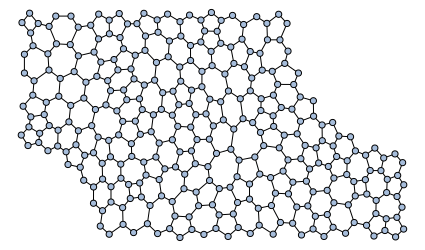

In [4]:
SVG(filename="examples/triangles_310.svg") # Show the newly created file

Congratulations! If you arrived there, you're likely to have fun by partitioning graphs with Crack. So, I will now detail a little bit what you can do with these files, and how.

# 2) Let's dive into (the) Crack

Here is the basic structure of Crack specification files:
- It begins with the keyword "do", followed by a list whose items are denoted by the "-" after an indent. Crack will execute each item in order.
- Each item is a call to a function, 
    - whose name is specified right after the "-"
    - then, a there is a ":" if you need to specify some parameters;
    - each parameter is given on a separated line with the right indent, by specifying
      [parameter_name]: parameter_value
 
 Now let's explain our specification file:

'-|-, Crack
'-|-, init_Mesh_from_mesh (took 0.004s)
'-|-, init_Graph_from_Mesh (took 0.005s)
'-|-, init_NWeights_unit (took 0.000s)
'-|-, init_NWeights_geometric_mountains (took 0.002s)
'-|-, init_EWeights_from_NWeights (took 0.001s)
'-|-, plot_Graph       (took 0.166s)
'-|-, Cracked (took 0.180s)


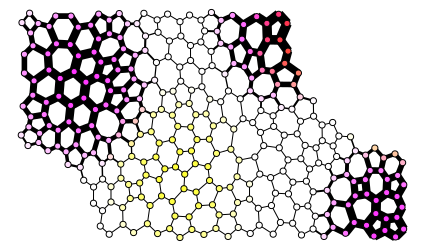

In [7]:
input_file = "examples/mesh/triangles_310.mesh"
out_file   = "examples/triangles_310_weights.svg"
with open("examples/tuto_spec.yaml", "w") as f:
    f.write(
"""#yaml
do:
    # Creates a Mesh entity from the given .mesh file.
    - init_Mesh_from_mesh:
        filename: {}
    # Creates the Dual Graph of this Mesh
    - init_Graph_from_Mesh:
        ngbr_dim: dual
    # Associates unit weights with every node in the Graph
    - init_NWeights_unit:
        crit: 0
        key_in: graph
    # Custom random node weights generation function
    - init_NWeights_geometric_mountains:
        crit: 1, 2
        key_in: mesh
        npeaks: 3
    # Associates weights with every edge, depending of the 
    # weights of its ends for criterion 1.
    - init_EWeights_from_NWeights:
        nweights_crit: 1
        key_in: graph
    - plot_Graph:
        out_file: {}
        image_size: [425, 250]
        colors: nweights
        edge_strokes: eweights
""".format(input_file, out_file)
    )
%run crack_part.py examples/tuto_spec.yaml
SVG(filename="examples/triangles_310_weights.svg")

Colors

# 3) Graph Partitioning with Crack